In [5]:
# Gaussian Smoothing + Correlation Measures
# Paper Reference: https://pmc.ncbi.nlm.nih.gov/articles/PMC2821165/#F7

import numpy as np 
import scipy.io as sio
from scipy.signal import convolve

import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn as default plotting style
sns.set()

In [6]:
# Load the Sample Data Set 
mat_data = sio.loadmat('../Data/ExampleDataSet_MonkeyData.mat');

# Extract a sample of the data
sample_freq = mat_data['sample_Hz'][0]
spike_train_1 = mat_data['SpikeTrains'][1,:,18]
spike_train_2 = mat_data['SpikeTrains'][1,:,19]

In [8]:
# Loop through various sigma sizes
# the study went as low as 2ms and up to 1ms
sigma_vals = np.arange(2, 100, 1)
correlation_vals = np.zeros(len(sigma_vals))

for indx, sigma in enumerate(sigma_vals):
    sigma = sigma / 1000 # turn into ms
    correlation_vals[indx] = calculate_correlation(spike_train_1, spike_train_2, sigma, sample_freq)

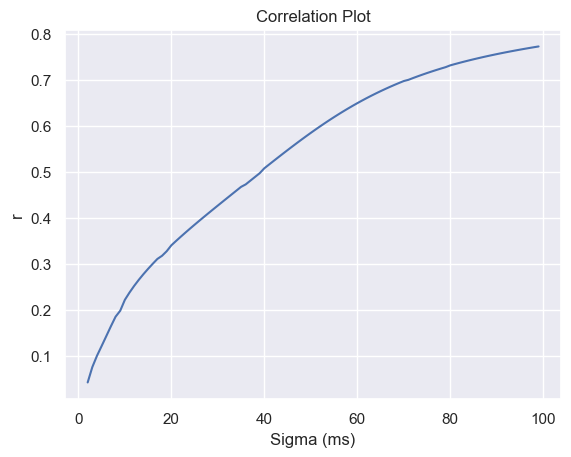

In [14]:
# Plot Correlation as a Function of Sigma 
sns.lineplot(x = sigma_vals , y = correlation_vals)
plt.title('Correlation Plot')
plt.xlabel('Sigma (ms)')
plt.ylabel('r')
plt.show()

In [3]:
def calculate_correlation(spike_train_a, spike_train_b, sigma, fs):

    # Develop the Gaussian Kernel
    dt = 1 / fs
    kernel_size = (6 * sigma / dt).astype(int)[0] # 6 ensures we are covering +/- 3 standard deviations

    # Check if kernel is odd so either side of gaussian is event
    if kernel_size % 2 == 0:
        kernel_size += 1

    # Kernel time vector
    kernel_t = np.linspace(-3 * sigma, 3 * sigma, kernel_size) 
    gaussian_kernel = (1 / (np.sqrt(2 * np.pi) * sigma) ) * np.exp(-kernel_t**2 / (2 * sigma**2))

    # Convolve with your spike trains
    convolve_train_a = convolve(spike_train_a, gaussian_kernel, mode = 'same')
    convolve_train_b = convolve(spike_train_b, gaussian_kernel, mode = 'same')

    # Calculate the Correlation between the signals
    numerator_val = np.mean(convolve_train_a*convolve_train_b)
    denominator_val = np.sqrt(np.mean(convolve_train_a*convolve_train_a)*np.mean(convolve_train_b*convolve_train_b))

    return numerator_val / denominator_val
    
    